In [24]:
import xarray as xr
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

In [27]:
eta = xr.open_dataset("run0000/eta.nc")

In [3]:
ls run

ShallowWaters_DoubleGyre.ipynb  run0000/
Untitled.ipynb                  run0001/


In [30]:
eta.coords["x"].attrs["axis"] = "X"
eta.coords["y"].attrs["axis"] = "Y"
eta.coords["t"].attrs["axis"] = "T"

In [16]:
eta.coords

Coordinates:
  * t        (t) int32 0 21432 42864 64296 ... 8572800 8594232 8615664 8637096
  * y        (y) float64 1e+04 3e+04 5e+04 7e+04 ... 1.95e+06 1.97e+06 1.99e+06
  * x        (x) float64 1e+04 3e+04 5e+04 7e+04 ... 1.95e+06 1.97e+06 1.99e+06

In [17]:
eta.coords["t"].attrs

{'units': 's', 'long_name': 'time', 'axis': 'T'}

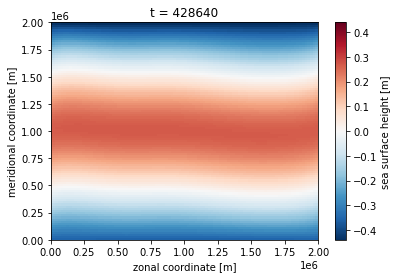

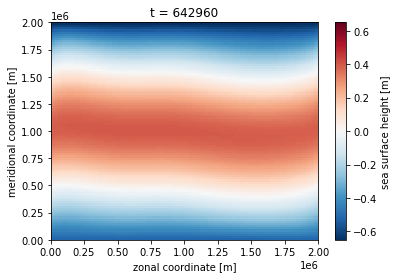

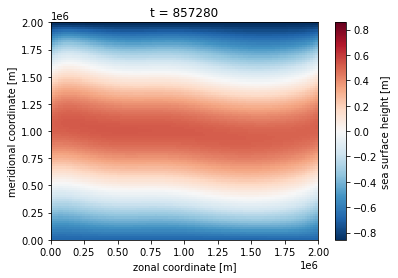

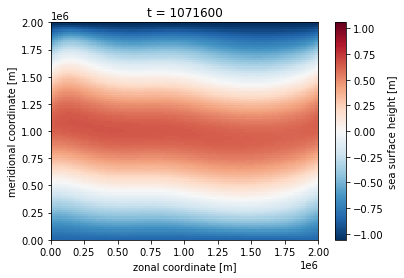

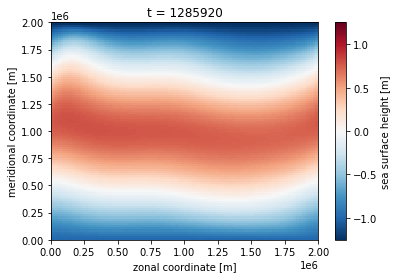

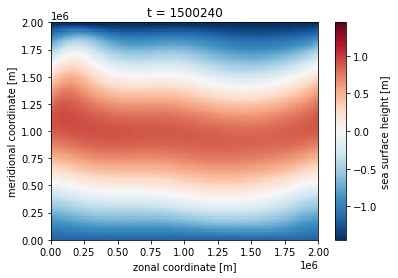

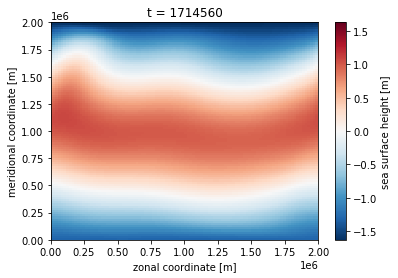

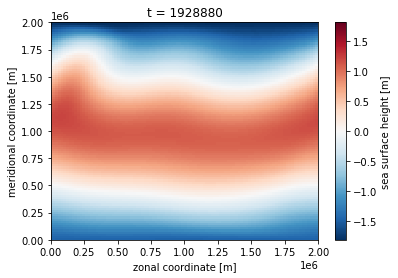

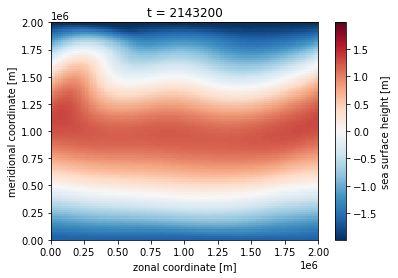

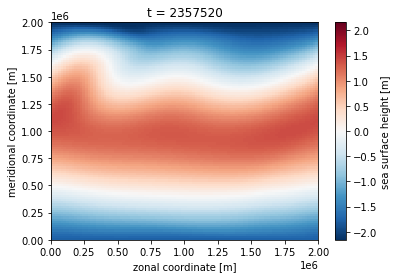

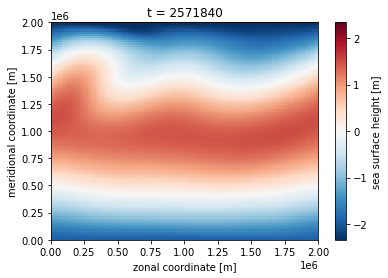

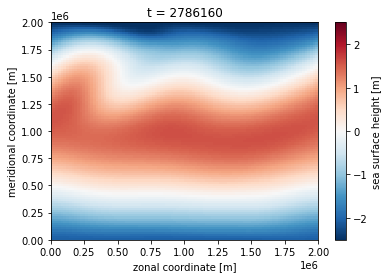

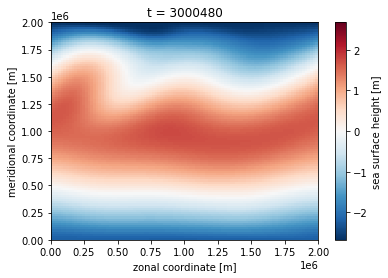

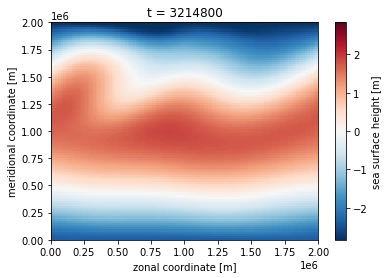

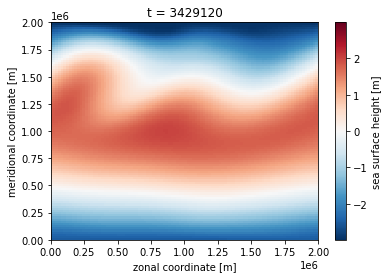

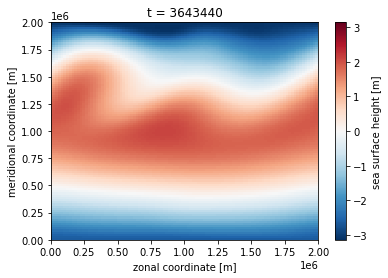

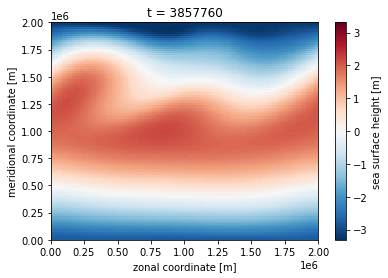

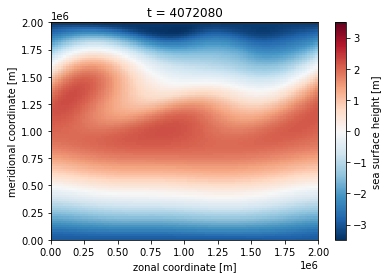

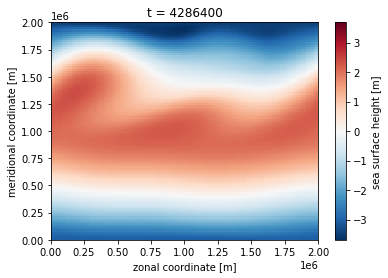

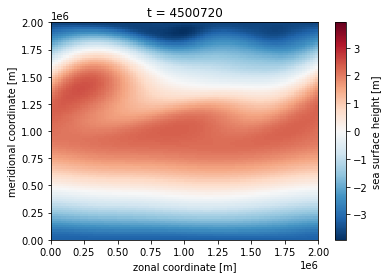

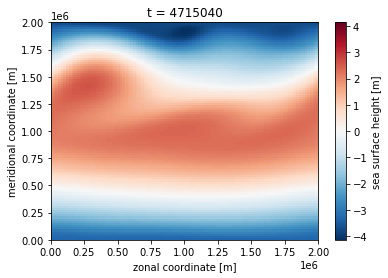

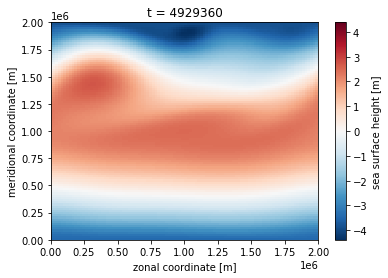

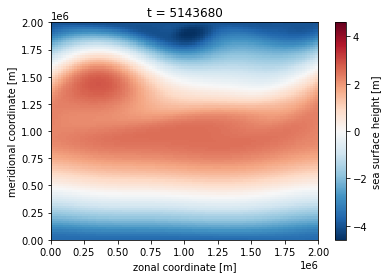

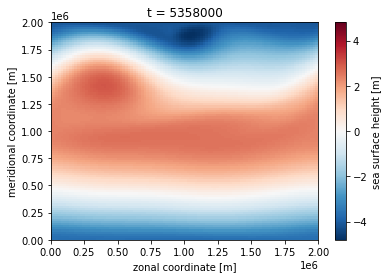

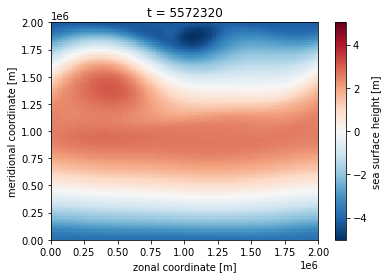

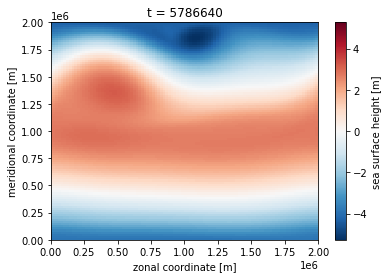

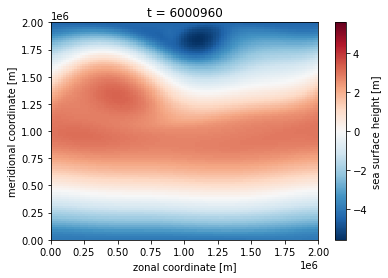

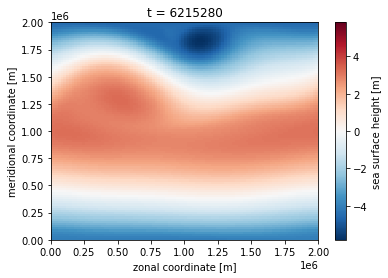

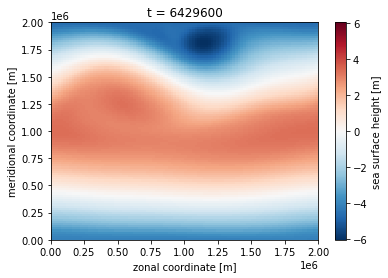

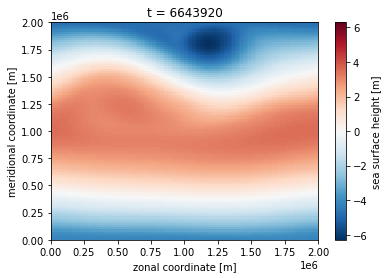

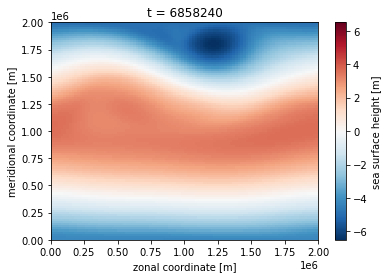

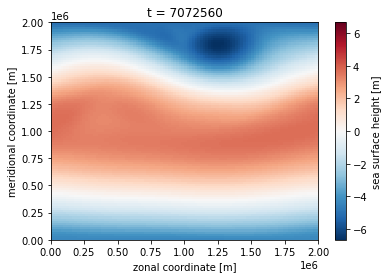

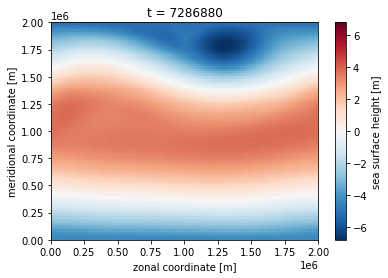

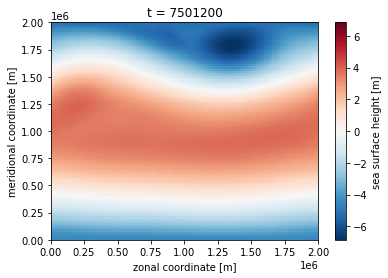

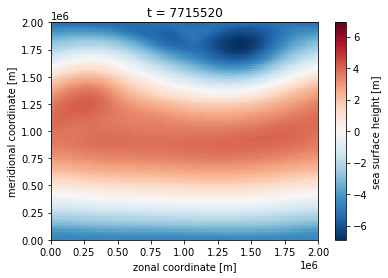

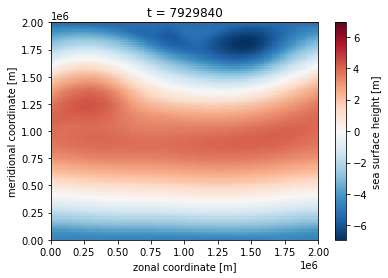

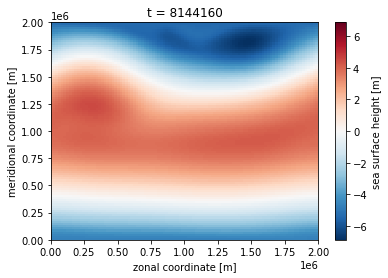

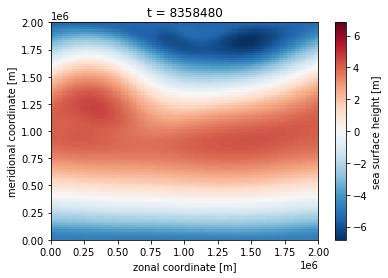

<Figure size 432x288 with 0 Axes>

In [31]:
for i in range(20, 400, 10):
    eta.eta.isel(t=i).plot()
    plt.show()
    plt.clf()

In [20]:
eta

<xarray.Dataset>
Dimensions:  (t: 404, x: 100, y: 100)
Coordinates:
  * t        (t) int32 0 21432 42864 64296 ... 8572800 8594232 8615664 8637096
  * y        (y) float64 1e+04 3e+04 5e+04 7e+04 ... 1.95e+06 1.97e+06 1.99e+06
  * x        (x) float64 1e+04 3e+04 5e+04 7e+04 ... 1.95e+06 1.97e+06 1.99e+06
Data variables:
    eta      (t, y, x) float32 ...

In [32]:
eta.to_netcdf('eta.nc')

In [38]:
nc_all = xr.open_mfdataset("run0000/*.nc")
nc_all.coords["x"].attrs["axis"] = "X"
nc_all.coords["y"].attrs["axis"] = "Y"
nc_all.coords["t"].attrs["axis"] = "T"
nc_all.to_netcdf('nc_all.nc')

<ipython-input-38-d6fa268e348e>:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  nc_all = xr.open_mfdataset("run0000/*.nc")
/Users/simon/anaconda3/envs/fronts/lib/python3.8/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require eithe

In [36]:
nc_all

<xarray.Dataset>
Dimensions:  (t: 404, x: 200, y: 199)
Coordinates:
  * x        (x) float64 0.0 1e+04 2e+04 3e+04 ... 1.97e+06 1.98e+06 1.99e+06
  * y        (y) float64 1e+04 2e+04 3e+04 4e+04 ... 1.97e+06 1.98e+06 1.99e+06
  * t        (t) int32 0 21432 42864 64296 ... 8572800 8594232 8615664 8637096
Data variables:
    eta      (t, y, x) float32 dask.array<chunksize=(404, 199, 200), meta=np.ndarray>
    sst      (t, y, x) float32 dask.array<chunksize=(404, 199, 200), meta=np.ndarray>
    u        (t, y, x) float32 dask.array<chunksize=(404, 199, 200), meta=np.ndarray>
    v        (t, y, x) float32 dask.array<chunksize=(404, 199, 200), meta=np.ndarray>